In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/2021-20221-20222 Saber Pro-2.xlsx')

Mounted at /content/drive


In [ ]:
df.dtypes

saber2021     float64
saber20221    float64
saber20222    float64
saber2022G    float64
dtype: object

In [ ]:
df = df.dropna(subset=["saber2021", "saber20221", "saber20222"])
t, p = ttest_ind(df["saber2021"], df["saber20221"], equal_var=False)
print("Estadística t: {:.2f}".format(t))
print("Valor p: {:.4f}".format(p))


Estadística t: 7.84
Valor p: 0.0000


In [ ]:
t, p = ttest_ind(df["saber20221"], df["saber20222"], equal_var=False)
print("Estadística t: {:.2f}".format(t))
print("Valor p: {:.4f}".format(p))

Estadística t: -2.66
Valor p: 0.0079


In [ ]:
t, p = ttest_ind(df["saber20222"], df["saber2022G"], equal_var=False)
print("Estadística t: {:.2f}".format(t))
print("Valor p: {:.4f}".format(p))

Estadística t: 2.66
Valor p: 0.0079


In [ ]:
#sns.histplot(df, bins=10, kde=True, stat="density")

In [ ]:
def plot_normal(df, periodo):
    plt.figure(figsize=(8, 6))
    plt.hist(df, density=True, alpha=0.6)
    plt.title(f'Histograma y distribución normal de calificaciones para {periodo}')
    mu, std = stats.norm.fit(df)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Media={:.2f}, Desviación estándar={:.2f}".format(mu, std)
    plt.legend([title])
    plt.show()


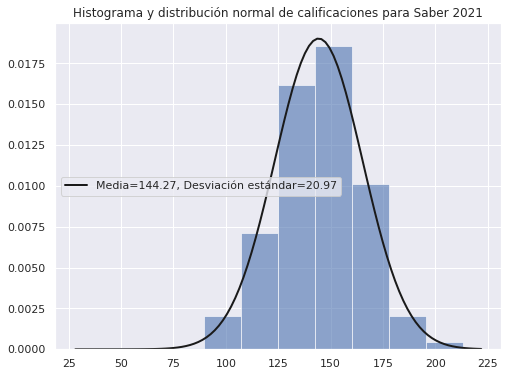

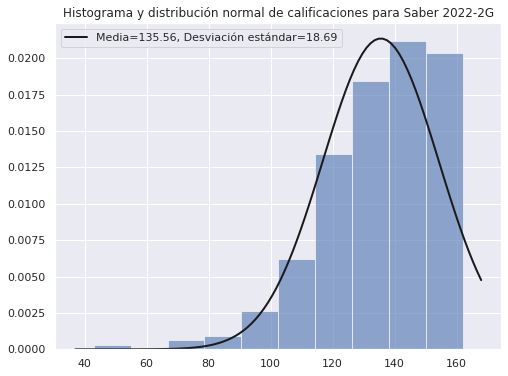

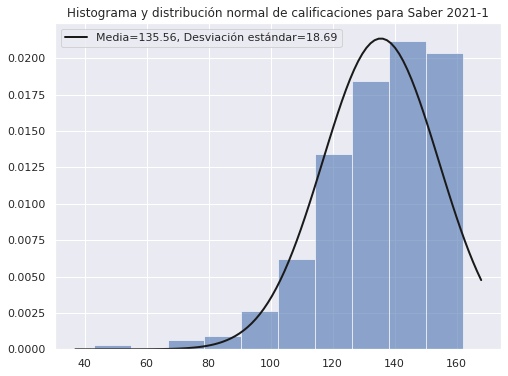

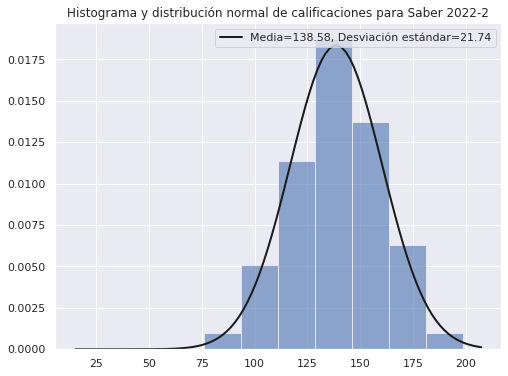

In [ ]:
plot_normal(df["saber2021"], "Saber 2021")
plot_normal(df["saber2022G"], "Saber 2022-2G")
plot_normal(df["saber20221"], "Saber 2021-1")
plot_normal(df["saber20222"], "Saber 2022-2")



In [ ]:
from operator import index
x=df['saber2021'],index

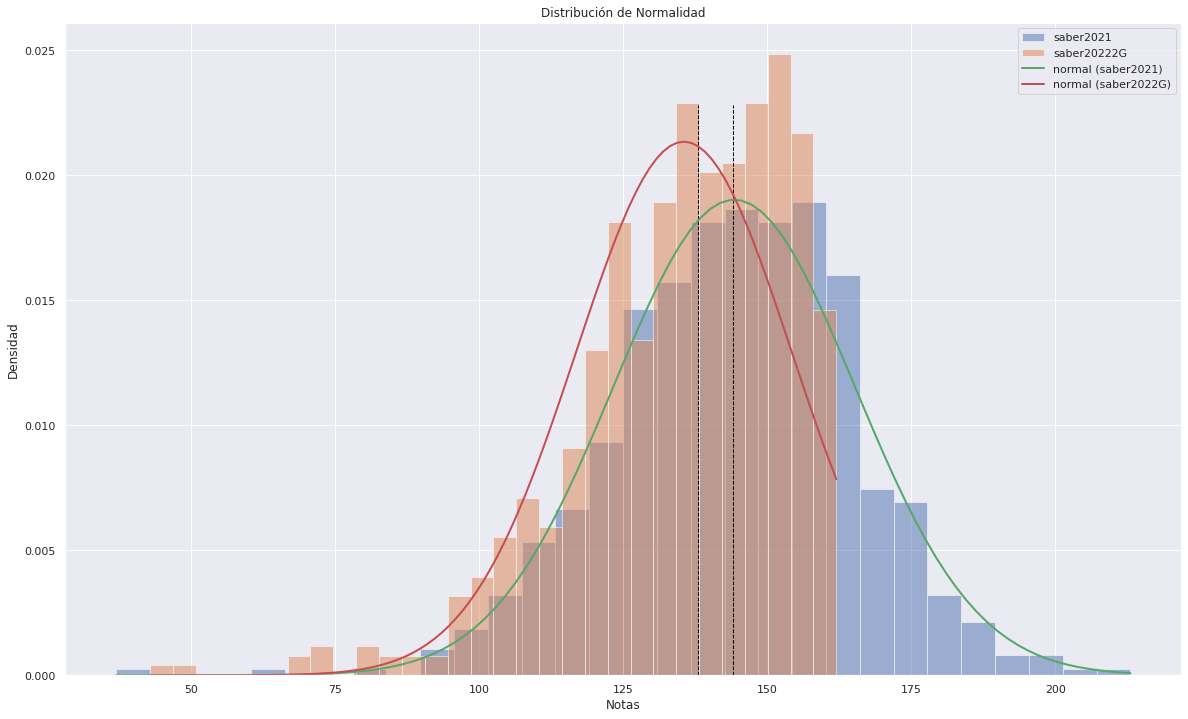

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


mu1, sigma1 = stats.norm.fit(df['saber2021'])
x_hat1 = np.linspace(min(df['saber2021']), max(df['saber2021']), num=100)
y_hat1 = stats.norm.pdf(x_hat1, mu1, sigma1)

#mu2, sigma2 = stats.norm.fit(df['saber20221'])
#x_hat2 = np.linspace(min(df['saber20221']), max(df['saber20221']), num=100)
#y_hat2 = stats.norm.pdf(x_hat2, mu2, sigma2)

mu3, sigma3 = stats.norm.fit(df['saber2022G'])
x_hat3 = np.linspace(min(df['saber2022G']), max(df['saber2022G']), num=100)
y_hat3 = stats.norm.pdf(x_hat3, mu3, sigma3)


fig, ax = plt.subplots(figsize=(20, 12))

ax.hist(df['saber2021'], density=True, bins=30, alpha=0.5, label='saber2021')
#ax.hist(df['saber20221'], density=True, bins=30, alpha=0.5, label='saber20221')
ax.hist(df['saber2022G'], density=True, bins=30, alpha=0.5, label='saber20222G')

medians = [df['saber2021'].median(), df['saber20221'].median(), df['saber20222'].median()]
#q1s = [df['saber2021'].quantile(0.25), df['saber20221'].quantile(0.25), df['saber20222'].quantile(0.25)]
medians = [df['saber2021'].median(), df['saber2022G'].median()]
q1s = [df['saber2021'].quantile(0.25), df['saber2022G'].quantile(0.25)]
q3s = [df['saber2021'].quantile(0.75), df['saber2022G'].quantile(0.75)]
#q3s = [df['saber2021'].quantile(0.75), df['saber20221'].quantile(0.75), df['saber20222'].quantile(0.75)]

for i, m in enumerate(medians):
    ax.plot([m, m], [0, y_hat1.max()*1.2], color='black', linewidth=1, linestyle='--')
    #ax.plot([q1s[i], q1s[i]], [0, y_hat1.max()*1.2], color='black', linewidth=1)
    #ax.plot([q3s[i], q3s[i]], [0, y_hat1.max()*1.2], color='black', linewidth=1)

ax.plot(x_hat1, y_hat1, linewidth=2, label='normal (saber2021)')
#ax.plot(x_hat2, y_hat2, linewidth=2, label='normal (saber20221)')
ax.plot(x_hat3, y_hat3, linewidth=2, label='normal (saber2022G)')



ax.set_title('Distribución de Normalidad')
ax.set_xlabel('Notas')
ax.set_ylabel('Densidad')
ax.legend()

plt.show()



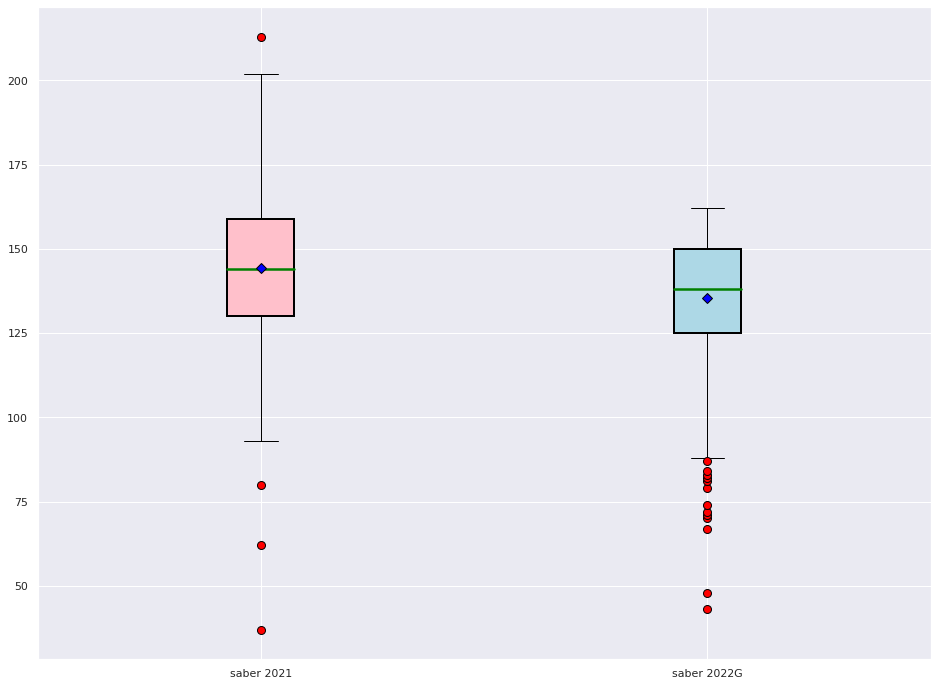

In [ ]:
data = df[['saber2021', 'saber2022G']]
plt.figure(figsize=(16,12))
boxprops = dict(linestyle='--', linewidth=2)
flierprops = dict(marker='o', markersize=8, markerfacecolor='red')
medianprops = dict(linestyle='-', linewidth=2.5, color='green')
meanprops = dict(marker='D', markersize=7, markeredgecolor='black', markerfacecolor='blue')
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey']
bp = plt.boxplot(data, vert=True, patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanprops, showmeans=True)

for i, box in enumerate(bp['boxes']):
    box.set(facecolor = colors[i])

columnas = ['saber 2021', 'saber 2022G']
plt.xticks(range(1, len(columnas) + 1), columnas)

plt.show()


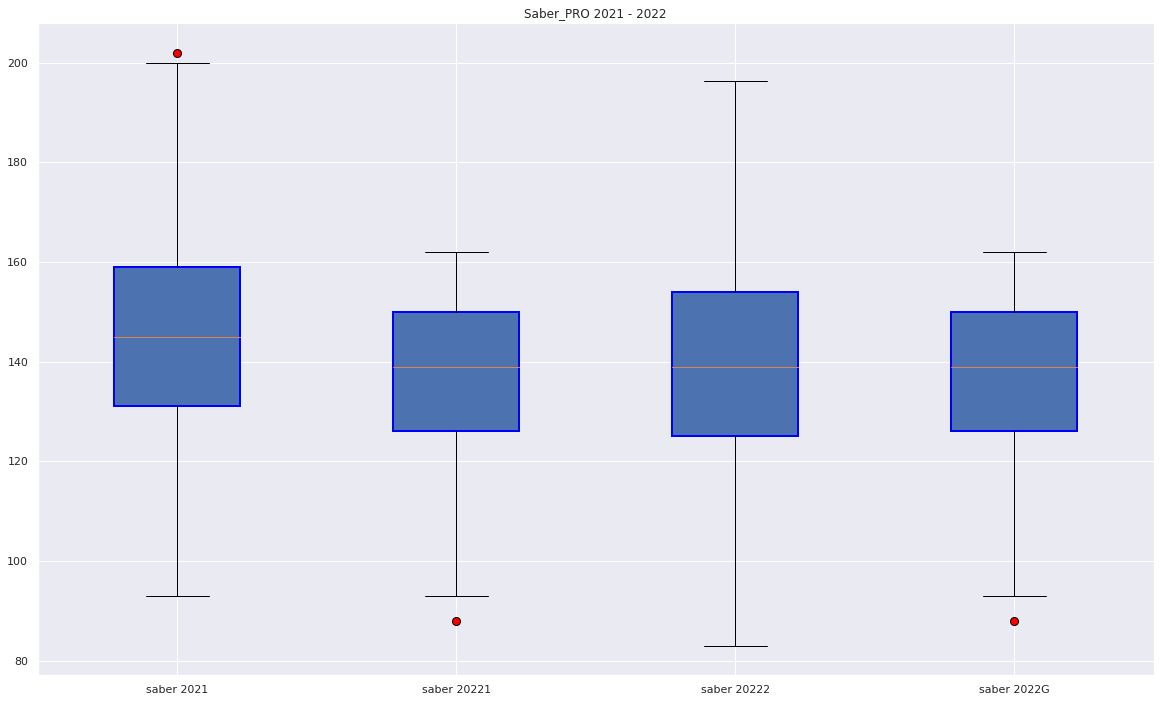

In [ ]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

data_clean.shape

plt.figure(figsize=(20,12))
boxprops = dict(linestyle='--', linewidth=2, color='blue')
flierprops = dict(marker='o', markersize=8, markerfacecolor='red')
plt.boxplot(data_clean, vert=True, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.title("Saber_PRO 2021 - 2022")
columnas = ['saber 2021', 'saber 20221', 'saber 20222', 'saber 2022G']
plt.xticks(range(1, len(columnas) + 1), columnas)

plt.show()


In [ ]:
data_clean['saber2022G'].mean()

136.84354838709677

In [ ]:
def plot_normal(data_clean, periodo):
    plt.figure(figsize=(8, 6))
    plt.hist(data_clean, density=True, alpha=0.6)
    plt.title(f'Histograma y distribución normal de calificaciones para {periodo}')
    mu, std = stats.norm.fit(data_clean)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Media={:.2f}, Desviación estándar={:.2f}".format(mu, std)
    plt.legend([title])
    plt.show()


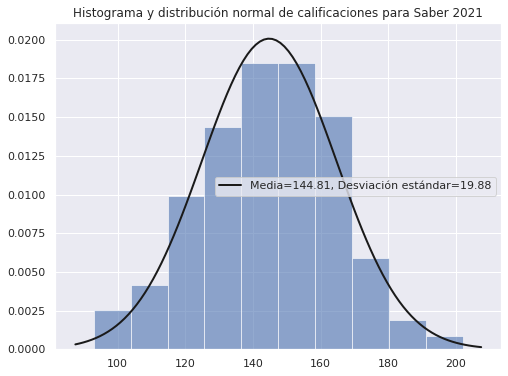

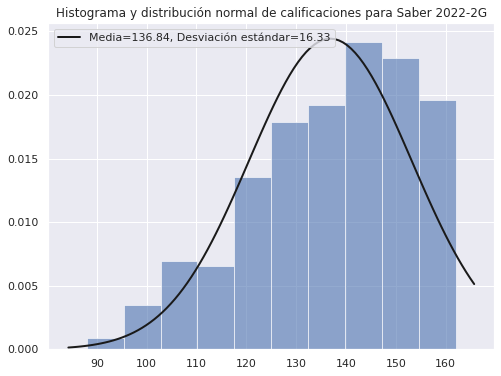

In [ ]:
plot_normal(data_clean["saber2021"], "Saber 2021")
plot_normal(data_clean["saber2022G"], "Saber 2022-2G")
#plot_normal(df["saber20221"], "Saber 2021-1")
#plot_normal(df["saber20222"], "Saber 2022-2")

